In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('telecom_battery.csv')
print(df.shape), print(df.columns)
df.isnull().sum() # df.dtypes

(31104, 12)
Index(['Timestamp', 'Current', 'Total voltage', 'SOC', 'Temperature', 'SOH',
       'Equivalent cycle', 'Application status', 'Grid status', 'Grid power',
       'Grid energy consumption', 'Grid cumulative energy consumption'],
      dtype='object')


Timestamp                             0
Current                               0
Total voltage                         0
SOC                                   0
Temperature                           0
SOH                                   0
Equivalent cycle                      0
Application status                    0
Grid status                           0
Grid power                            0
Grid energy consumption               0
Grid cumulative energy consumption    0
dtype: int64

- 12 variables in the given dataset.
- No null values in data.

In [3]:
df.apply(lambda x: [len(x.unique()), min(x), max(x)])

Timestamp                             [31104, 1556701215000.0, 1587804215000.0]
Current                                                       [3, -300.0, 10.0]
Total voltage                                       [12415, 48.16034624, 66.72]
SOC                                                  [11395, -0.155713561, 1.0]
Temperature                                   [31104, 20.26327524, 136.1181556]
SOH                                                   [31104, 0.919398347, 1.0]
Equivalent cycle                                      [11397, 0.0, 107.8477185]
Application status                                                [2, 0.0, 1.0]
Grid status                                                       [2, 0.0, 1.0]
Grid power                                      [11028, 0.0, 654.0143492999999]
Grid energy consumption                        [11028, 0.0, 181.67065259999998]
Grid cumulative energy consumption             [11029, 0.0, 1913713.1509999998]
dtype: object

- 'Timestamp' = the length of unix time stamp given is 13. So it is in the milli seconds...dividing it by 1000 gives us the actual time stamp in seconds...using it we can convert to date time format. 
- 'Current' = In general, current (i) is a continous varaible Although there are only 3 unique values and looks like a categorical variable here.
- 'Total voltage' = continous variable
- 'SOC' = state of charge = continous variable
- 'Temperature' = continous variable
- 'SOH' = state of health = continous variable
- 'Equivalent Cycle' = continous variable
- 'Application Status' = clearly yes/no type and is is categorical variable
- 'Grid Status' = clearly yes/no type and is is categorical variable
- 'Grid Power' = continous variable
- 'Grid Energy Consumption' = continous variable
- 'Grid Cumulative Energy Consumption' = continous variable

So In Overall, there are 2 categorical variables (Grid status & Application status), 1 time variable (Timestamp) & 9 continous variables.

#### converting unix timestamp to datetime

In [4]:
# converting to seconds (standard posix time)
df['Timestamp'] = df['Timestamp'].apply(lambda x: x/1000)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit = 's')

diff = df['Timestamp'].values[2] - df['Timestamp'].values[1]
print('time delta for each observation:', diff.astype('timedelta64[s]'))
df['Timestamp'].min(), df['Timestamp'].max()

time delta for each observation: 1000 seconds


(Timestamp('2019-05-01 09:00:15'), Timestamp('2020-04-25 08:43:35'))

- data collected is from 01-05-2019 to 25-04-2020 in time delta of 1000 seconds.
- Scatter Plot are simple way to identify the linear relationship or if two variables are correlated.
- Statiscally, we can measure the correlation b/w two numerical variables using Pearson\Spearman correlation coefficeints.
- Typically, correlation coefficients lie in range of -1 (strong negative correalation) to 1 (strong positive correlation).
- If correlation value is 0, it represents there is no relation b/w the given variables.
- Pearson correlation is used on data with normal distrbution and Spearman correlation is used on non-standarized data to migitate the affect of the outliers.


- Null Hypothesis (H0) : two variables are not correlated to each other.
- Alternate Hypothesis : two variables are correlated
- I will be using Spearman correlation coefficient as, data is not standardized, there can be outliers.

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pointbiserialr, spearmanr 

# null hypothesis H0 = there is no correlation between the two variables
# p < 0.05 reject null hypothesis

def test_correlation(x, y, method = 'spearman'):
    
    """
    function to test spearman/pointbiseralr correlation b/w two variables.
    
    :param x: Pandas series
    :param y: Pandas series
    :param method: choose from 'spearman' (spearmanr) or 'pbs'(pointbiserialr)
    """
    
    # spearman rank correlation is robust to outliers due to ranking
    plt.figure(figsize = (6,4))
    plt.scatter(x, y)
    plt.title('Scatter plot b/w {} & {}'.format(x.name, y.name))
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
    if method == 'spearman':
        result = spearmanr(x, y)
    elif method == 'pbs':
        result = pointbiserialr(x, y)
        
    return result

#### 'Grid Status' v/s 'SOC' (categorical v/s continous)

PointbiserialrResult(correlation=0.22794666128545965, pvalue=0.0)

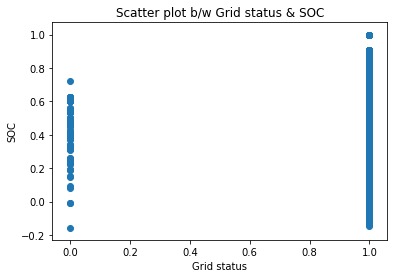

In [6]:
test_correlation(df['Grid status'], df['SOC'], method = 'pbs')

- The relation between Grid Status' and 'SOC' (categorical v/s continous) can termed as weak positive correlation.
- I have used the point-bi-serial correlation as Grid status is a binary variable & SOC is continous variable. Spearman correlation co-efficient is more suitable for the conitnous data.
- The p value 0 is less than 5% significance & we can reject the null hypothesis that two variables are not related.

#### 'Equivalent Cycle' v/s 'SOH' (continous v/s continous)

SpearmanrResult(correlation=-0.9999891918148037, pvalue=0.0)

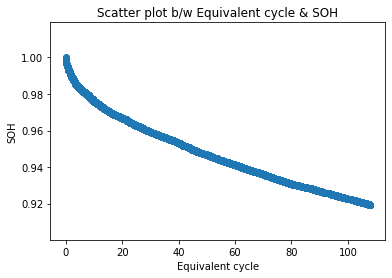

In [7]:
test_correlation(df['Equivalent cycle'], df['SOH'], method = 'spearman')

- The relation between 'Equivalent Cycle' v/s 'SOH' (continous v/s continous) can termed as strong negative correlation.
- The p value 0 is less than 5% significance (0.05) & we can reject the null hypothesis that two variables are not related.

#### 'SOC' v/s 'Temperature' (continous v/s continous)

SpearmanrResult(correlation=-0.2066032952919746, pvalue=5.306806318224385e-297)

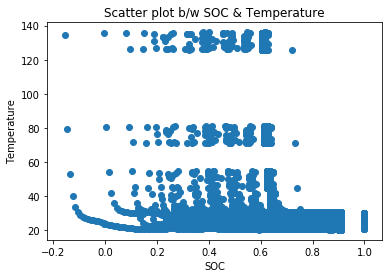

In [8]:
test_correlation(df['SOC'], df['Temperature'], method = 'spearman')

- The relation between - 'SOC' v/s 'Temperature'(continous v/s continous) can termed as weak negative correlation.
- The p value 0 is less than 5% significance (0.05) & we can reject the null hypothesis that two variables are not related.